This was done in google colab.

The questions in the Task Details pdf are answered in the last.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Fraud Dataset/Fraud.csv")

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
import pandas as pd


print(df.memory_usage(deep=True).sum() / (1024**2), "MB")


1598.1942768096924 MB


In [ ]:
#Since memory usage <3GB so no need to load data in chunks. So we will proceed with whole Data at once.

**Data Inspection**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
for i in df.columns:

  print(df[i].value_counts())

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
706        4
721        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
amount
10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
151849.59         1
341252.72         1
431409.04         1
344148.22         1
258347.61         1
Name: count, Length: 5316900, dtype: int64
nameOrig
C1530544995    3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
              ..
C1567523029    1
C644777639     1
C1256645416    1
C1231536757    1
C1971151096    1
Name: count, Length: 6353307, dtype: int64
oldbalanceOrg
0.00         2102449
184.00           918
133.00           914
195.00           912
164.00           909
              ...   
533881.37          1
288393.93   

No amiguity in values as we saw above

In [ ]:
d=df[(df["oldbalanceDest"]==df["newbalanceDest"]) & (df["type"]=="TRANSFER")][["type","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud","isFlaggedFraud"]]

In [ ]:
d["isFraud"].value_counts()

,count
isFraud,
1,4068
0,106


Most Rows with Payment Type Transfer and with no change of old and new balance of destination account are fraud.

In [ ]:
df[df["isFraud"]==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


All Fraud Transactions are for Payment Type 'TRANSFER' and 'CASH_OUT'

Checking for Outliers

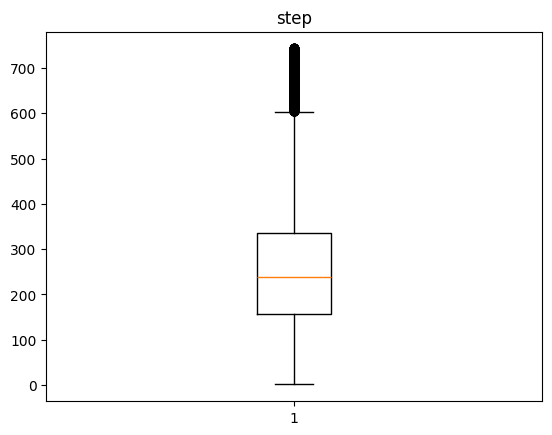

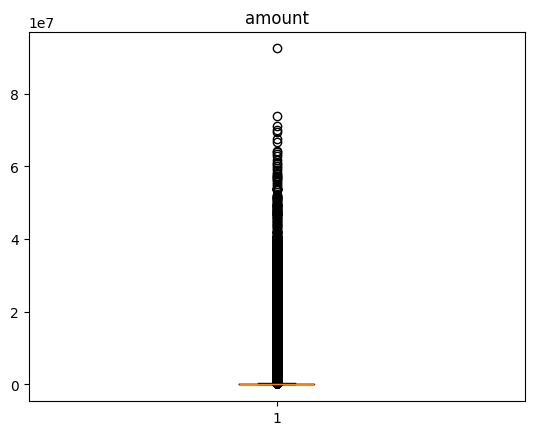

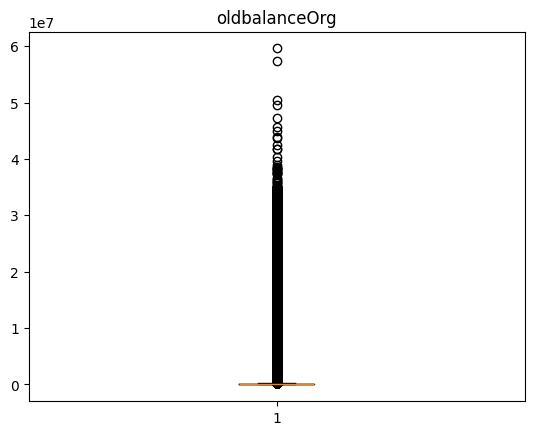

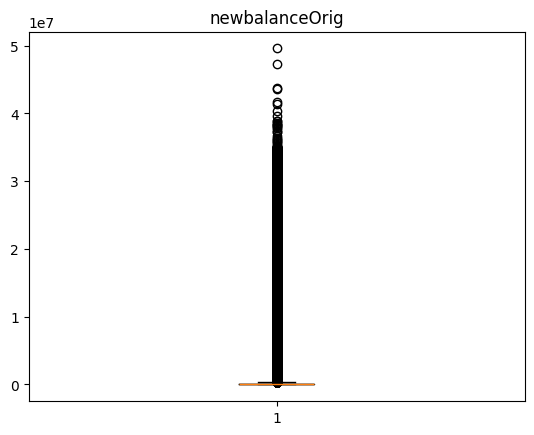

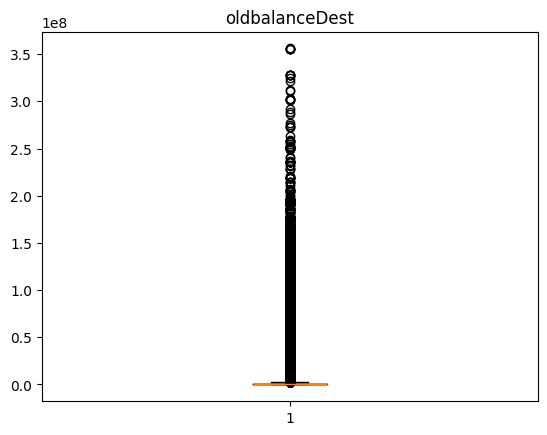

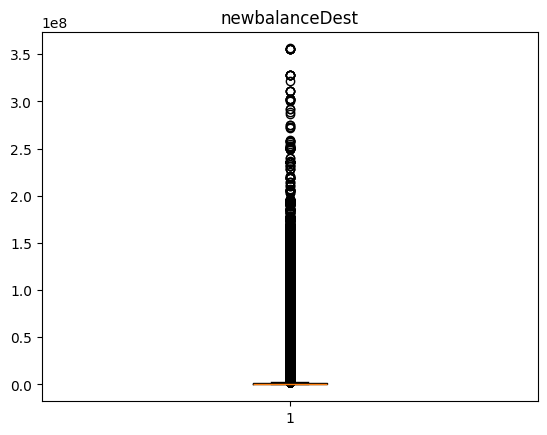

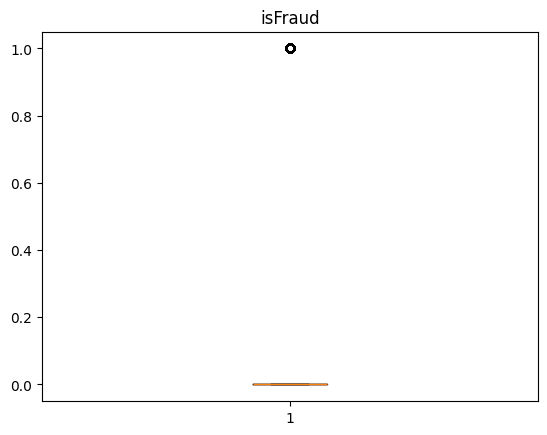

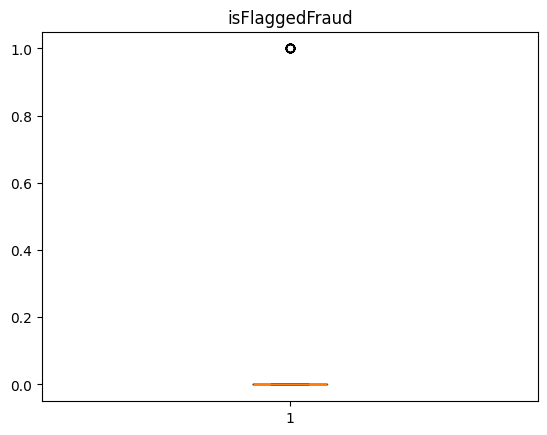

In [ ]:
for i in df.columns:
  if (df[i].dtype=="float64") or (df[i].dtype=="int64"):
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

Transactions in fraud datasets naturally have extreme values (e.g. large amounts in fraudulent transfers).
In this project, I chose to retain these outliers without removal or modification, as they may represent genuine fraudulent activities and carry important predictive signals for the model.

Correlation Check

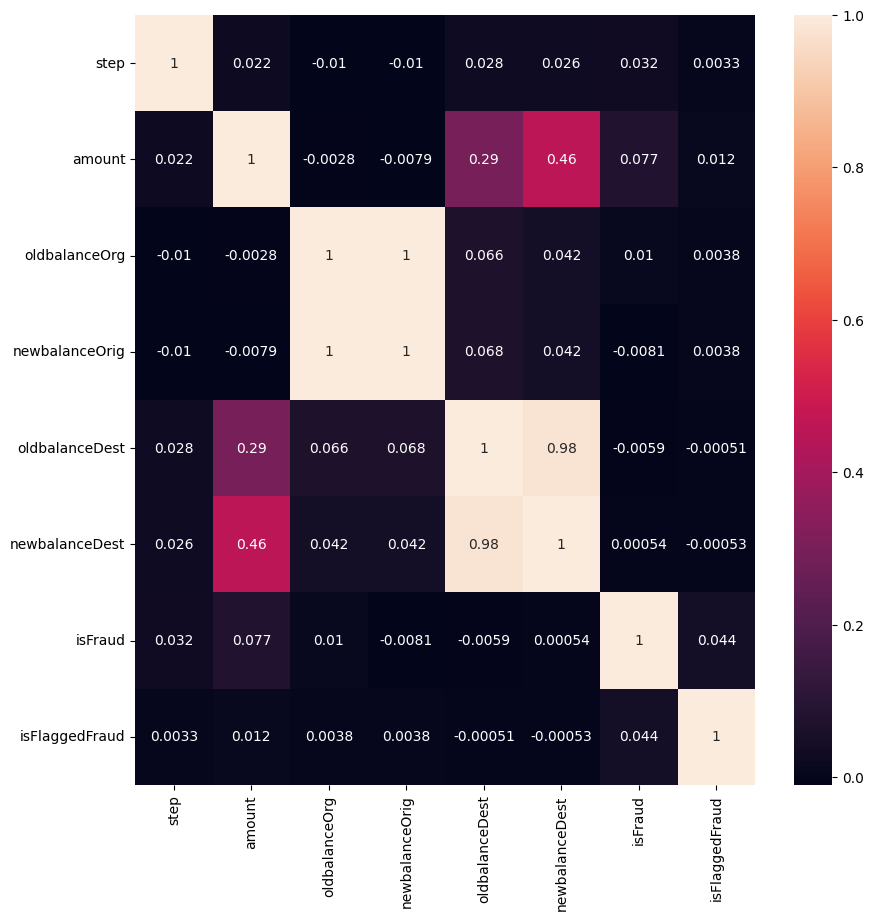

In [ ]:
df1=df.copy()
df1.drop(["nameDest","nameOrig","type"],axis=1,inplace=True)
c=df1.corr()
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(c,annot=True)
plt.show()

So as we can see from above, oldbalanceOrg is highly correlated with newbalanceOrig and oldbalanceDest is highly correlated with newbalanceDest but this obvious mathematically since oldbalanceOrg = newbalanceOrig - amount and oldbalanceDest = newbalanceDest + amount.
What we can do here is remove one of each pair or keep them both as the slight difference might help the model. So we will try both and keep the better performing model.

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
!pip install xgboost#installing xgboost

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


This is the Base Model without feature engineering

In [ ]:
#one hot encoding
df2=df.copy()
df2=pd.get_dummies(df2,columns=["type"],drop_first=False)


In [ ]:
#model without correlated features
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
x=df2.drop(["isFraud","isFlaggedFraud","nameOrig","nameDest","newbalanceOrig","oldbalanceDest"],axis=1)
y=df2["isFraud"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
# Count class imbalance
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count

model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,  # weight fraud cases more
    eval_metric="aucpr",
    random_state=42,
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6
)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9950795950934259
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.20      0.98      0.34      2435

    accuracy                           1.00   1908786
   macro avg       0.60      0.99      0.67   1908786
weighted avg       1.00      1.00      1.00   1908786



In [ ]:
y_proba = model.predict_proba(x_test)[:, 1]  # probability of class 1 (fraud)
from sklearn.metrics import precision_recall_curve, f1_score

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Calculate F1 for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_index = f1_scores.argmax()
best_threshold = thresholds[best_index]

print("Best Threshold:", best_threshold)
print("Best F1 Score:", f1_scores[best_index])

y_pred_new = (y_proba >= best_threshold).astype(int)
print(classification_report(y_test,y_pred_new))

Best Threshold: 0.989689
Best F1 Score: 0.871603856266433
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.93      0.82      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.97      0.91      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



In [ ]:
#model with both the features
x=df2.drop(["isFraud","isFlaggedFraud","nameOrig","nameDest"],axis=1)
y=df2["isFraud"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
# Count class imbalance
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count

model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,  # weight fraud cases more
    eval_metric="aucpr",
    random_state=42,
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6
)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9983486886429385
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.43      0.98      0.60      2435

    accuracy                           1.00   1908786
   macro avg       0.72      0.99      0.80   1908786
weighted avg       1.00      1.00      1.00   1908786



The model with the correlated features perform better so let's keep the correlated features and perform further steps

In [ ]:
y_proba = model.predict_proba(x_test)[:, 1]  # probability of class 1 (fraud)
from sklearn.metrics import precision_recall_curve, f1_score

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Calculate F1 for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_index = f1_scores.argmax()
best_threshold = thresholds[best_index]

print("Best Threshold:", best_threshold)
print("Best F1 Score:", f1_scores[best_index])

y_pred_new = (y_proba >= best_threshold).astype(int)
print(classification_report(y_test,y_pred_new))

Best Threshold: 0.9895802
Best F1 Score: 0.9058372390285472
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.94      0.87      0.91      2435

    accuracy                           1.00   1908786
   macro avg       0.97      0.94      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786



<Figure size 1000x600 with 0 Axes>

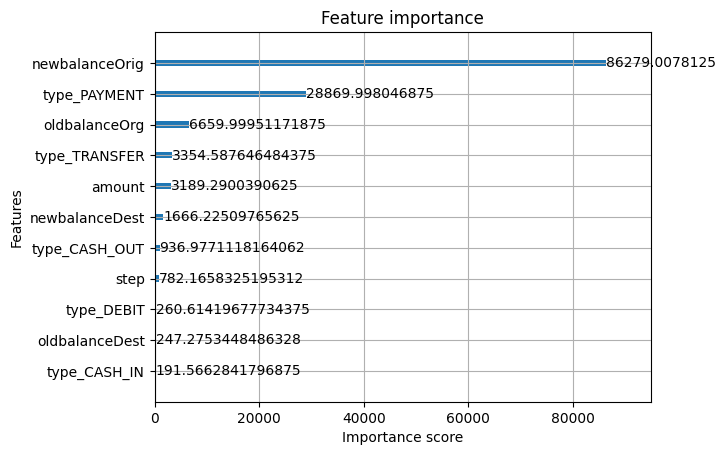

           Feature    Importance
3   newbalanceOrig  86279.007812
9     type_PAYMENT  28869.998047
2    oldbalanceOrg   6659.999512
10   type_TRANSFER   3354.587646
1           amount   3189.290039
5   newbalanceDest   1666.225098
7    type_CASH_OUT    936.977112
0             step    782.165833
8       type_DEBIT    260.614197
4   oldbalanceDest    247.275345
6     type_CASH_IN    191.566284


In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# 1. Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(model, importance_type='gain')  # 'gain', 'weight', or 'cover'
plt.show()

# 2. Get importance values in a DataFrame
import pandas as pd
importance = model.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
}).sort_values(by='Importance', ascending=False)

print(importance_df)


Let's Try Adding Some Features And Check If The Model Works Better

In [ ]:
df3=df.copy()
#adding a feature which tells if the origin bank account balance changed or not
df3["Orgbalancechange"]=(df3["newbalanceOrig"]==df3["oldbalanceOrg"]).astype(int)
#adding a feature which tells if the destination bank account balance changed or not
df3["Destbalancechange"]=(df3["newbalanceDest"]==df3["oldbalanceDest"]).astype(int)
#adding a feature which tells if the origin bank account was emptied
df3["Zero_Orig_Balance"]=(df3["newbalanceOrig"]==0).astype(int)


In [ ]:
df3.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Orgbalancechange,Destbalancechange,Zero_Orig_Balance
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,1,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,1,0


In [ ]:
df3=pd.get_dummies(df3,columns=["type"],drop_first=False)

In [ ]:
x=df3.drop(["isFraud","isFlaggedFraud","nameOrig","nameDest"],axis=1)
y=df3["isFraud"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
from xgboost import XGBClassifier
# Count class imbalance
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count
model=XGBClassifier(scale_pos_weight=scale_pos_weight,  # weight fraud cases more
    eval_metric="aucpr",
    random_state=42,
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9985493397374038
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.47      0.99      0.63      2435

    accuracy                           1.00   1908786
   macro avg       0.73      0.99      0.82   1908786
weighted avg       1.00      1.00      1.00   1908786



Tuning the threshold

In [ ]:
y_proba = model.predict_proba(x_test)[:, 1]  # probability of class 1 (fraud)
from sklearn.metrics import precision_recall_curve, f1_score

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Calculate F1 for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_index = f1_scores.argmax()
best_threshold = thresholds[best_index]

print("Best Threshold:", best_threshold)
print("Best F1 Score:", f1_scores[best_index])

y_pred_new = (y_proba >= best_threshold).astype(int)
print(classification_report(y_test,y_pred_new))

Best Threshold: 0.9893742
Best F1 Score: 0.9160824304227747
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.95      0.89      0.92      2435

    accuracy                           1.00   1908786
   macro avg       0.97      0.94      0.96   1908786
weighted avg       1.00      1.00      1.00   1908786



<Figure size 1000x600 with 0 Axes>

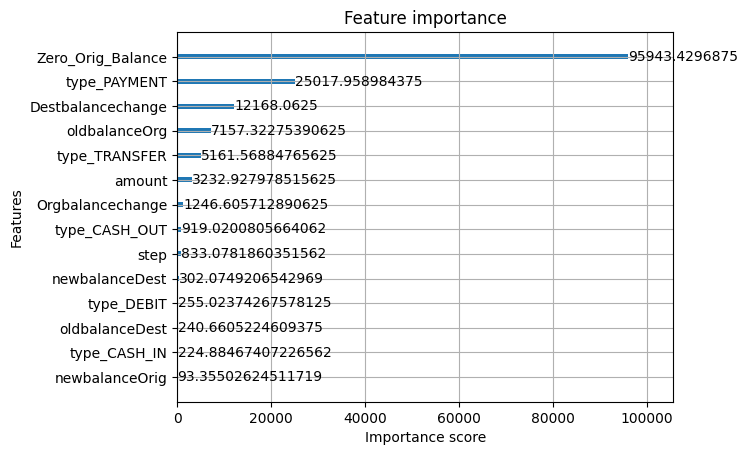

              Feature    Importance
8   Zero_Orig_Balance  95943.429688
12       type_PAYMENT  25017.958984
7   Destbalancechange  12168.062500
2       oldbalanceOrg   7157.322754
13      type_TRANSFER   5161.568848
1              amount   3232.927979
6    Orgbalancechange   1246.605713
10      type_CASH_OUT    919.020081
0                step    833.078186
5      newbalanceDest    302.074921
11         type_DEBIT    255.023743
4      oldbalanceDest    240.660522
9        type_CASH_IN    224.884674
3      newbalanceOrig     93.355026


In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# 1. Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(model, importance_type='gain')  # 'gain', 'weight', or 'cover'
plt.show()

# 2. Get importance values in a DataFrame
import pandas as pd
importance = model.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
}).sort_values(by='Importance', ascending=False)

print(importance_df)

**Answering The Questions Given in the pdf-**
1. Data cleaning including missing values, outliers and multi-collinearity.

ANS- **Missing Values** - There were no missing values.

**Outliers** - There were outliers but it is normal in Fraud detection datasets. I kept the outliers because they respresented important patterns for example, the average transaction amount for data labeled 'Not Fraud' is around 140k and that of "Fraud" is around 1.4 million. So I kept the outliers.

**multi-collinearity-** There were highly correlated features. I created a model without them and a model with them and the model with the correlated features performed better so I kept them.

2. Describe your fraud detection model in elaboration.

ANS - **a.Model Selection:**
XGBoost -So I tried logistics Regression,Decision Tree, Random Forest and XGBoost models and XGBoost gave me the best results so I chose it as my base model. I used evaluation metric as 'aucpr' instead of logloss as logloss focusses on getting true values but I wanted more focus on precision and recall (detecting Fraud correctly). Other parameters I kept them general. This model performed well. I tried doing Hyperparameter tuning but it was taking a lot of time and runtime was getting disconnected again and again so dropped the idea since model was already performing well.

**b.Feature Engineering:**
When I was doing data inspection, I saw some patterns like when Destination balance is not changing the transaction was Fraud, all Fraud transactions had type as TRANSFER or CASH_OUT,when the new balance of origin account was 0,the transaction was detected Fraud. So I created features for them.

One Hot Encoding - I did one hot encoding on the categorical column 'type'. Since number of features were less and the values of the columns were not related so used one hot encoding rather then label encoding.

**c.Threshold Tuning:**
The general threshold for classification is taken 0.5 by the model but with that threshold the performance was not good. So I tuned the threshold using precision-recall curve. I chose the threshold for which I got the best F1 Score (chose F1 score to keep balance between Precision and Recall).After tuning the threshold the model performed very well.

**Note:**I performed same feature engineering for Random Forest Base model but it did not change the the model performance infact it made the performance of the model slightly worse. So I was a bit skeptical on doing the same on xgboost but I did and surprisingly got better results from it.

**d.Feature Importance:** Found the gain score for all features and it also proved that features I added helped the model perform better.

3. How did you select variables to be included in the model?

ANS- So first I removed nameOrig and nameDest as they are just names of the accounts and won't help model to learn anything. I also thought that there might be a possibility that some accounts might be involved in more than 1 fraud transactions but I checked and there were no such accounts so I dropped the account names.

All other features I kept because I thought they were important. The steps feature was also kept as there might be a pattern such there might be a specific time/times where more Fraud transactions occur.

I added 3 extra features-

a.Orgbalancechange - It checks if there is a difference between oldbalanceOrg and newbalanceOrig because I saw pattern that when oldbalanceOrg = newbalanceOrig then it might be Fraud.

b.Destbalancechange - It checks if there is a difference between oldbalanceDest and newbalanceDest because similar to above , I saw pattern that when oldbalanceDest = newbalanceDest then it might be Fraud.

c.Zero_Orig_Balance - It checks if newbalanceOrig = 0 which means if the origin account was completely emptied. I saw a pattern that when the Origin account was completely emptied then it was a Fraud.

4. Demonstrate the performance of the model by using best set of tools.

ANS- This is the performance of our final model

Best Threshold: 0.9893742

Best F1 Score: 0.9160824304227747

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.95      0.89      0.92      2435

    accuracy                           1.00   1908786
    macro avg      0.97      0.94      0.96   1908786
    weighted avg   1.00      1.00      1.00   1908786

We can improve the recall by increasing the threshold to 0.99 but I went for the best F1 score to keep balance between precision and recall.

5. What are the key factors that predict fraudulent customer?

ANS- These are the top 6 features impacting our model based on gain



              Feature                 Importance

              8   Zero_Orig_Balance  95943.429688
              12  type_PAYMENT       25017.958984
              7   Destbalancechange  12168.062500
              2   oldbalanceOrg      7157.322754
              13  type_TRANSFER      5161.568848
              1   amount             3232.927979



6. Do these factors make sense? If yes, How? If not, How not?

ANS- Yes these factors do matter.

a. Zero_Orig_Balance - Fraudsters often drain the account completely to avoid leaving traceable funds. This can be a strong indicator of Fraud.

b. type_PAYMENT - This might be a negative indicator i.e. whenever the transaction type is 'PAYMENT' , it is most probably "Not Fraud". As we have observed above that all Fraud transactions are for transacton type "TRANSFER" and "CASH_OUT"

c. Destbalancechange - In normal transactions, the destination account’s balance should change after receiving money.If the balance does not change (flag = 1), it might mean the transaction was reversed quickly,It was a fake or fraudulent transfer that was not actually credited and it was a money-laundering attempt with an immediate withdrawal.

d. oldbalanceOrg - Some fraudsters drain accounts completely and others keep small balances to avoid detection. Both extremes can be useful for spotting anomalies.

e. type_TRANSFER - This might be a positive indicator. As discussed above the transaction type "TRASNFER" and "CASH_OUT" has all the Fraud transactions.

f. amount - Fraud often happens in either very high amounts (maximizing gain) or small repeated amounts (to avoid detection). The model learns these patterns.



7. What kind of prevention should be adopted while company update its infrastructure?

ANS- These are some recommendations from my side -

**a. Real-Time Transaction Monitoring :**
Implement real-time scoring of transactions using the trained fraud detection model.

Flag or hold transactions for manual review when the model predicts high fraud probability — especially if-

Zero_Orig_Balance = 1 (account emptied after transaction)

Destbalancechange = 1 (destination balance didn’t change)

Unusual or rare transaction types (TRANSFER, CASH_OUT in large amounts)

**b. Rule-Based Alerts Alongside ML :**
Create hard business rules in parallel with the ML model:

Block transactions that empty the sender account and are followed by Destbalancechange = 1.

Monitor large TRANSFER or CASH_OUT events that are unusual for that account’s history.

Flag accounts that make multiple PAYMENT transactions above typical thresholds in a short time.

**c. User Verification & Limits :**

Enforce stronger verification for First time high value transactions,
transactions from new devices or locations.

Temporarily limit suspicious accounts until verification is completed.

Now, for above rules you might say that this might harm the customer experience but we can expemt the rules for trusted customers and apply them strictly on new customers. If done in well planned way then this will reduce number of Fraud transactions.


8. Assuming these actions have been implemented, how would you determine if they work?

ANS -
**a. Track Key Fraud Metrics Over Time :**
Compare fraud related KPIs before and after implementation:

Fraud Rate = (Fraudulent Transactions / Total Transactions) × 100

Detection Rate (Recall) — % of frauds correctly identified by the system.

False Positive Rate — % of genuine transactions wrongly flagged.

Look for a downward trend in fraud rate while maintaining or improving detection rate.

**b. Conduct A/B Testing :**
Roll out the new system to a test group of customers or regions while keeping a control group on the old system.Compare fraud incidents, detection accuracy, and operational costs between the two groups.

**c. Monitor Model Performance :**
Recalculate Precision, Recall, F1-score, and ROC AUC monthly.If the F1-score remains high and recall improves, the measures are working.Watch for data drift — if transaction patterns change, retrain the model.

**d. Review Manual Investigations :**
Check if the proportion of true frauds among flagged transactions increases (higher precision).Ask fraud investigation teams for qualitative feedback — are the alerts relevant and actionable?



